## Madre Project Kitoko and Hassan Salifou

In [1]:
# --- Import necessary libraries ---
import pandas as pd
import glob
import os

# --- Display settings ---
max_rows_to_display = 100
max_columns_to_display = 50
pd.set_option('display.max_rows', max_rows_to_display)
pd.set_option('display.max_columns', max_columns_to_display)

# ======================================================
print("\n" + "="*60)
print("📊 LOAD AND DISPLAY THE MERGED DATASET WITH TARGET COLUMN")
print("="*60)

# --- Path to the folder containing CSV files ---
folder_path = '.'  # Current folder
file_pattern = os.path.join(folder_path, "*.csv")
csv_file_list = glob.glob(file_pattern)

if not csv_file_list:
    print(f"❌ NO CSV files found in the folder: '{os.path.abspath(folder_path)}'")
else:
    print(f"✅ {len(csv_file_list)} CSV files found. Loading in progress...")

    # --- Reading CSV files ---
    dataframe_list = []
    for file in csv_file_list:
        try:
            temp_df = pd.read_csv(file, encoding='utf-8')
            dataframe_list.append(temp_df)
            print(f"  → {os.path.basename(file)} : {len(temp_df)} rows")
        except Exception as e:
            print(f"  → ⚠️ Error reading file '{file}': {e}")

    # --- Merge all DataFrames ---
    if dataframe_list:
        df = pd.concat(dataframe_list, ignore_index=True)
        print(f"\n🎉 Merge completed! The DataFrame contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

        # --- Optional: clean column names (remove spaces) ---
        df.columns = df.columns.str.strip().str.replace(' ', '_')

        # --- List available columns ---
        print("🕵️ List of available columns in the DataFrame:")
        for col in df.columns.tolist():
            print(f"- {col}")
        print("="*60)

        # --- Display the full merged DataFrame ---
        print("\nDisplaying merged DataFrame:")
        display(df)

        # --- Check the target column 'Label' ---
        target_col = 'Label'
        print(f"\n🎯 Target column: '{target_col}'")
        if target_col in df.columns:
            print("Unique values in Label:", df[target_col].unique())
        else:
            print("❌ Column 'Label' not found in the dataset.")

    else:
        print("\n❌ No files were successfully read. Merge canceled.")



📊 LOAD AND DISPLAY THE MERGED DATASET WITH TARGET COLUMN
✅ 8 CSV files found. Loading in progress...
  → Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv : 225745 rows
  → Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv : 286467 rows
  → Friday-WorkingHours-Morning.pcap_ISCX.csv : 191033 rows
  → Monday-WorkingHours.pcap_ISCX.csv : 529918 rows
  → Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv : 288602 rows
  → Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv : 170366 rows
  → Tuesday-WorkingHours.pcap_ISCX.csv : 445909 rows
  → Wednesday-workingHours.pcap_ISCX.csv : 692703 rows

🎉 Merge completed! The DataFrame contains 2830743 rows and 79 columns.

🕵️ List of available columns in the DataFrame:
- Destination_Port
- Flow_Duration
- Total_Fwd_Packets
- Total_Backward_Packets
- Total_Length_of_Fwd_Packets
- Total_Length_of_Bwd_Packets
- Fwd_Packet_Length_Max
- Fwd_Packet_Length_Min
- Fwd_Packet_Length_Mean
- Fwd_Packet_Length_Std
- Bwd_Packet_Length_Max
- Bwd_Pa

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_Bytes/s,Flow_Packets/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,...,Avg_Bwd_Segment_Size,Fwd_Header_Length.1,Fwd_Avg_Bytes/Bulk,Fwd_Avg_Packets/Bulk,Fwd_Avg_Bulk_Rate,Bwd_Avg_Bytes/Bulk,Bwd_Avg_Packets/Bulk,Bwd_Avg_Bulk_Rate,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,0,0,0.0,0.0,4.000000e+06,666666.666700,3.0,0.000000,3,3,3,3.00000,0.00000,3,3,...,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,1.100917e+05,18348.623850,109.0,0.000000,109,109,0,0.00000,0.00000,0,0,...,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,2.307692e+05,38461.538460,52.0,0.000000,52,52,0,0.00000,0.00000,0,0,...,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,3.529412e+05,58823.529410,34.0,0.000000,34,34,0,0.00000,0.00000,0,0,...,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,0,0,0.0,0.0,4.000000e+06,666666.666700,3.0,0.000000,3,3,3,3.00000,0.00000,3,3,...,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,53,32215,4,2,112,152,28,28,28.0,0.00000,76,76,76.0,0.0,8.194940e+03,186.248642,6443.0,13617.579480,30780,3,30832,10277.33333,17755.84381,30780,4,...,76.0,80,0,0,0,0,0,0,4,112,2,152,-1,-1,3,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830739,53,324,2,2,84,362,42,42,42.0,0.00000,181,181,181.0,0.0,1.376543e+06,12345.679010,108.0,183.597386,320,2,2,2.00000,0.00000,2,2,...,181.0,40,0,0,0,0,0,0,2,84,2,362,-1,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830740,58030,82,2,1,31,6,31,0,15.5,21.92031,6,6,6.0,0.0,4.512195e+05,36585.365850,41.0,52.325902,78,4,4,4.00000,0.00000,4,4,...,6.0,64,0,0,0,0,0,0,2,31,1,6,1006,0,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830741,53,1048635,6,2,192,256,32,32,32.0,0.00000,128,128,128.0,0.0,4.272221e+02,7.628965,149805.0,375521.040500,1000947,1,1033613,206722.60000,444210.06860,1000947,1,...,128.0,120,0,0,0,0,0,0,6,192,2,256,-1,-1,5,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN



🎯 Target column: 'Label'
Unique values in Label: ['BENIGN' 'DDoS' 'PortScan' 'Bot' 'Infiltration'
 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection' 'FTP-Patator' 'SSH-Patator' 'DoS slowloris'
 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed']


In [3]:
import numpy as np

# --- Remove duplicates ---
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"{before - after} duplicates removed ({after} rows remaining).")

# --- Replace infinite values with NaN ---
df.replace([float('inf'), float('-inf')], pd.NA, inplace=True)
print("Infinite values replaced with NaN.")

# --- Remove columns with too many missing values ---
missing_threshold = 0.4  # plus strict
missing_percent = df.isnull().mean()
cols_to_drop_missing = missing_percent[missing_percent > missing_threshold].index.tolist()

# --- Remove constant columns ---
cols_to_drop_constant = [col for col in df.columns if df[col].nunique() <= 1]

# --- Remove high-cardinality categorical columns ---
high_cardinality_threshold = 50
categorical_cols = df.select_dtypes(include='object').columns
cols_to_drop_high_card = [col for col in categorical_cols if df[col].nunique() > high_cardinality_threshold]

# --- Remove highly correlated numeric columns ---
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr().abs()
upper = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape)).astype(bool))
cols_to_drop_corr = [col for col in upper.columns if any(upper[col] > 0.9)]

# --- Combine all columns to drop ---
cols_to_drop = list(set(cols_to_drop_missing + cols_to_drop_constant + cols_to_drop_high_card + cols_to_drop_corr))

# --- Protect the target column ---
target_col = 'Label'
cols_to_drop = [col for col in cols_to_drop if col != target_col]

print(f"\nNumber of columns to drop: {len(cols_to_drop)}")
print("Columns to drop:", cols_to_drop)

# --- Drop columns ---
df_cleaned = df.drop(columns=cols_to_drop)

# --- Preview the cleaned DataFrame ---
print(f"\nCleaned DataFrame shape: {df_cleaned.shape}")
display(df_cleaned.head())

# --- Remaining columns ---
print("\nRemaining columns after cleaning:")
print(df_cleaned.columns.tolist())


308381 duplicates removed (2522362 rows remaining).
Infinite values replaced with NaN.

Number of columns to drop: 40
Columns to drop: ['Subflow_Fwd_Bytes', 'Fwd_Avg_Packets/Bulk', 'Flow_IAT_Max', 'Packet_Length_Mean', 'Bwd_Avg_Bytes/Bulk', 'CWE_Flag_Count', 'Bwd_URG_Flags', 'SYN_Flag_Count', 'Bwd_Packet_Length_Std', 'Fwd_Header_Length.1', 'Avg_Bwd_Segment_Size', 'Subflow_Bwd_Packets', 'Avg_Fwd_Segment_Size', 'ECE_Flag_Count', 'Fwd_IAT_Total', 'Subflow_Fwd_Packets', 'Bwd_IAT_Min', 'Bwd_Avg_Packets/Bulk', 'Idle_Max', 'Subflow_Bwd_Bytes', 'Bwd_PSH_Flags', 'Fwd_Avg_Bulk_Rate', 'Fwd_Packet_Length_Std', 'Fwd_IAT_Std', 'Average_Packet_Size', 'Idle_Min', 'Max_Packet_Length', 'Packet_Length_Variance', 'Idle_Mean', 'Packet_Length_Std', 'Fwd_IAT_Mean', 'Total_Length_of_Bwd_Packets', 'Bwd_Avg_Bulk_Rate', 'Flow_Packets/s', 'Active_Min', 'Bwd_Packet_Length_Mean', 'Fwd_IAT_Max', 'Fwd_Avg_Bytes/Bulk', 'Flow_Bytes/s', 'Total_Backward_Packets']

Cleaned DataFrame shape: (2522362, 39)


,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Length_of_Fwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Min,Fwd_IAT_Min,Bwd_IAT_Total,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Fwd_PSH_Flags,Fwd_URG_Flags,Fwd_Header_Length,Bwd_Header_Length,Fwd_Packets/s,Bwd_Packets/s,Min_Packet_Length,FIN_Flag_Count,RST_Flag_Count,PSH_Flag_Count,ACK_Flag_Count,URG_Flag_Count,Down/Up_Ratio,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Idle_Std,Label
0,54865,3,2,12,6,6,6.0,0,0,3.0,0.0,3,3,0,0.0,0.0,0,0,0,40,0,666666.666700,0.000000,6,0,0,0,1,0,0,33,-1,1,20,0.0,0.0,0,0.0,BENIGN
1,55054,109,1,6,6,6,6.0,6,6,109.0,0.0,109,0,0,0.0,0.0,0,0,0,20,20,9174.311927,9174.311927,6,0,0,0,1,1,1,29,256,0,20,0.0,0.0,0,0.0,BENIGN
2,55055,52,1,6,6,6,6.0,6,6,52.0,0.0,52,0,0,0.0,0.0,0,0,0,20,20,19230.769230,19230.769230,6,0,0,0,1,1,1,29,256,0,20,0.0,0.0,0,0.0,BENIGN
3,46236,34,1,6,6,6,6.0,6,6,34.0,0.0,34,0,0,0.0,0.0,0,0,0,20,20,29411.764710,29411.764710,6,0,0,0,1,1,1,31,329,0,20,0.0,0.0,0,0.0,BENIGN
4,54863,3,2,12,6,6,6.0,0,0,3.0,0.0,3,3,0,0.0,0.0,0,0,0,40,0,666666.666700,0.000000,6,0,0,0,1,0,0,32,-1,1,20,0.0,0.0,0,0.0,BENIGN



Remaining columns after cleaning:
['Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets', 'Total_Length_of_Fwd_Packets', 'Fwd_Packet_Length_Max', 'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean', 'Bwd_Packet_Length_Max', 'Bwd_Packet_Length_Min', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Min', 'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Fwd_PSH_Flags', 'Fwd_URG_Flags', 'Fwd_Header_Length', 'Bwd_Header_Length', 'Fwd_Packets/s', 'Bwd_Packets/s', 'Min_Packet_Length', 'FIN_Flag_Count', 'RST_Flag_Count', 'PSH_Flag_Count', 'ACK_Flag_Count', 'URG_Flag_Count', 'Down/Up_Ratio', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward', 'Active_Mean', 'Active_Std', 'Active_Max', 'Idle_Std', 'Label']


In [5]:
# --- Count NaN values per column ---
nan_counts = df.isna().sum()
print("Number of NaN values per column:\n")
display(nan_counts[nan_counts > 0].sort_values(ascending=False))

# --- Optional: percentage of NaN per column ---
nan_percent = (df.isna().mean() * 100).round(2)
print("\nPercentage of NaN values per column:\n")
display(nan_percent[nan_percent > 0].sort_values(ascending=False))


df_cleaned = df.dropna()
print(f"Rows after dropping NaN: {df_cleaned.shape[0]}")


Number of NaN values per column:



Flow_Bytes/s      1564
Flow_Packets/s    1564
dtype: int64


Percentage of NaN values per column:



Flow_Bytes/s      0.06
Flow_Packets/s    0.06
dtype: float64

Rows after dropping NaN: 2520798


In [7]:
# 6. LABEL MAPPING

if target_col not in df_cleaned.columns:
    raise KeyError(f"❌ The target column '{target_col}' does not exist in the DataFrame.")

print("\nUnique labels before mapping:")
print(df_cleaned[target_col].unique())

# Mapping multiple attacks to general categories
mapping_label = {
    'BENIGN': 0,
    'SSH-Bruteforce': 1,
    'FTP-BruteForce': 1,
    'Brute Force': 1,
    'DDoS': 2,
    'DDOS attack-HOIC': 2,
    'DDOS attack-LOIC-UDP': 2,
    'DDOS attack-LOIC-HTTP': 2,
    'DoS GoldenEye': 3,
    'DoS Hulk': 3,
    'DoS Slowhttptest': 3,
    'DoS slowloris': 3,
    'DoS': 3,
    'Heartbleed': 4,
    'Infiltration': 5,
    'PortScan': 6,
    'Port Scan': 6,
    'Web Attack – Brute Force': 7,
    'Web Attack – XSS': 7,
    'Web Attack – Sql Injection': 7,
    'WebAttack': 7
}

# Apply mapping
df_cleaned['Attack_Number'] = df_cleaned[target_col].map(mapping_label)

# Check for unmapped labels
labels_non_map = df_cleaned[df_cleaned['Attack_Number'].isna()][target_col].unique()
if len(labels_non_map) > 0:
    print("\n⚠️ Some labels were not mapped:")
    print(labels_non_map)
else:
    print("\n✅ All labels mapped successfully.")

# Convert to integer type (optional)
df['Attack_Number'] = df_cleaned['Attack_Number'].astype('Int64')

# Display distribution
print("\nDistribution of classes after mapping:")
display(df_cleaned['Attack_Number'].value_counts().sort_index())

# Mapping reference
print("\nLabel mapping reference:")
for label, code in mapping_label.items():
    print(f"{code}: {label}")


Unique labels before mapping:
['BENIGN' 'DDoS' 'PortScan' 'Bot' 'Infiltration'
 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection' 'FTP-Patator' 'SSH-Patator' 'DoS slowloris'
 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed']


C:\Users\HP\AppData\Local\Temp\ipykernel_17292\3151462097.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Attack_Number'] = df_cleaned[target_col].map(mapping_label)



⚠️ Some labels were not mapped:
['Bot' 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection' 'FTP-Patator' 'SSH-Patator']

Distribution of classes after mapping:


Attack_Number
0.0    2095057
2.0     128014
3.0     193745
4.0         11
5.0         36
6.0      90694
Name: count, dtype: int64


Label mapping reference:
0: BENIGN
1: SSH-Bruteforce
1: FTP-BruteForce
1: Brute Force
2: DDoS
2: DDOS attack-HOIC
2: DDOS attack-LOIC-UDP
2: DDOS attack-LOIC-HTTP
3: DoS GoldenEye
3: DoS Hulk
3: DoS Slowhttptest
3: DoS slowloris
3: DoS
4: Heartbleed
5: Infiltration
6: PortScan
6: Port Scan
7: Web Attack – Brute Force
7: Web Attack – XSS
7: Web Attack – Sql Injection
7: WebAttack


In [9]:
# ======================================================
# 4. DATA BALANCING
# ======================================================
from sklearn.utils import resample

# Check if the attack column exists
if 'Attack_Number' not in df.columns:
    raise KeyError("❌ The column 'Attack_Number' is missing.")

# --- Step 1: Create a binary attack type column ---
# 0 → BENIGN
# 1 → Any kind of attack
df.loc[:, 'attack_type'] = df['Attack_Number'].apply(lambda x: 0 if x == 0 else 1)

print("Binary column 'attack_type' created:")
display(df['attack_type'].value_counts())

# --- Step 2: Check class imbalance ---
count_benign = df[df['attack_type'] == 0].shape[0]
count_attack = df[df['attack_type'] == 1].shape[0]

print("\nInitial class distribution:")
print(f"- BENIGN (0): {count_benign}")
print(f"- ATTACK (1): {count_attack}")

# --- Step 3: Balance the dataset ---
# Define target size for each class
target_size = 10_000

# Random sampling without replacement
benign_sample = resample(
    df[df['attack_type'] == 0],
    replace=False,
    n_samples=min(target_size, count_benign),
    random_state=42
)

attack_sample = resample(
    df[df['attack_type'] == 1],
    replace=False,
    n_samples=min(target_size, count_attack),
    random_state=42
)

# Combine the balanced subsets
df_balanced = pd.concat([benign_sample, attack_sample], ignore_index=True)

print(f"\nBalanced dataset contains {df_balanced.shape[0]} rows in total.")
print("Final class distribution:")
display(df_balanced['attack_type'].value_counts())

# --- Step 4: Quick preview of the balanced DataFrame ---
display(df_balanced.head())


Binary column 'attack_type' created:


attack_type
0    2095057
1     427305
Name: count, dtype: int64


Initial class distribution:
- BENIGN (0): 2095057
- ATTACK (1): 427305

Balanced dataset contains 20000 rows in total.
Final class distribution:


attack_type
0    10000
1    10000
Name: count, dtype: int64

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_Bytes/s,Flow_Packets/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,...,Fwd_Avg_Bytes/Bulk,Fwd_Avg_Packets/Bulk,Fwd_Avg_Bulk_Rate,Bwd_Avg_Bytes/Bulk,Bwd_Avg_Packets/Bulk,Bwd_Avg_Bulk_Rate,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Attack_Number,attack_type
0,443,117574295,32,39,13132,9169,1646,0,410.375000,684.473838,1231,0,235.102564,459.845100,189.675813,0.603873,1.679633e+06,3.632447e+06,10000000,3,118000000,3.791546e+06,4.725032e+06,10000000,540,...,0,0,0,0,0,0,32,13132,39,9169,29200,661,10,32,677642.6364,2126711.184,7089918,36136,10000000.0,13146.4887,10000000,9968007,BENIGN,0,0
1,443,193333,7,5,376,3508,201,0,53.714286,78.686539,1460,0,701.600000,731.564625,20089.68981,62.069073,1.757573e+04,3.377168e+04,85291,40,193333,3.222217e+04,4.260964e+04,88144,185,...,0,0,0,0,0,0,7,376,5,3508,8192,60,6,20,0.0000,0.000,0,0,0.0,0.0000,0,0,BENIGN,0,0
2,443,435704,10,8,843,917,581,0,84.300000,182.045812,773,0,114.625000,270.753941,4039.43962,41.312451,2.562965e+04,4.491948e+04,119403,1,435704,4.841156e+04,5.439174e+04,120311,3,...,0,0,0,0,0,0,10,843,8,917,65535,5186,5,32,0.0000,0.000,0,0,0.0,0.0000,0,0,BENIGN,0,0
3,53,289,2,2,60,288,30,30,30.000000,0.000000,144,144,144.000000,0.000000,1204152.249,13840.83045,9.633333e+01,1.651222e+02,287,1,1,1.000000e+00,0.000000e+00,1,1,...,0,0,0,0,0,0,2,60,2,288,-1,-1,1,20,0.0000,0.000,0,0,0.0,0.0000,0,0,BENIGN,0,0
4,53,252129,1,1,58,202,58,58,58.000000,0.000000,202,202,202.000000,0.000000,1031.218146,7.932447,2.521290e+05,0.000000e+00,252129,252129,0,0.000000e+00,0.000000e+00,0,0,...,0,0,0,0,0,0,1,58,1,202,-1,-1,0,32,0.0000,0.000,0,0,0.0,0.0000,0,0,BENIGN,0,0


In [11]:

# 5. SAVE CLEANED & BALANCED DATASET

import os

# Check if the balanced DataFrame exists
if 'df_balanced' not in locals():
    raise NameError("❌ The DataFrame 'df_balanced' does not exist.")

# --- Step 1: Create a subset for experiments ---
# Take ~15,000 random rows
subset_size = 15_000
df_subset = df_balanced.sample(n=min(subset_size, len(df_balanced)), random_state=42)
print(f"Subset created: {df_subset.shape[0]} rows selected for experiments.")

# --- Step 2: Create the output folder if it doesn't exist ---
output_dir = "data"
os.makedirs(output_dir, exist_ok=True)

# --- Step 3: Save as compressed CSV (gzip) ---
csv_gz_path = os.path.join(output_dir, "data_processed.csv.gz")
df_subset.to_csv(csv_gz_path, index=False, compression='gzip')
print(f"Compressed CSV file saved: {csv_gz_path}")

# --- Step 4: Backup save as normal CSV ---
csv_path = os.path.join(output_dir, "data_processed.csv")
df_subset.to_csv(csv_path, index=False)
print(f"Backup CSV file saved: {csv_path}")

# --- Step 5: Quick verification ---
print("\nPreview of the saved subset:")
display(df_subset.head())


Subset created: 15000 rows selected for experiments.
Compressed CSV file saved: data\data_processed.csv.gz
Backup CSV file saved: data\data_processed.csv

Preview of the saved subset:


,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_Bytes/s,Flow_Packets/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,...,Fwd_Avg_Bytes/Bulk,Fwd_Avg_Packets/Bulk,Fwd_Avg_Bulk_Rate,Bwd_Avg_Bytes/Bulk,Bwd_Avg_Packets/Bulk,Bwd_Avg_Bulk_Rate,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Attack_Number,attack_type
10650,80,80667963,8,5,56,11601,20,0,7.000000,5.656854,5840,0,2320.2,2436.833027,144.505942,0.161154,6.722330e+06,2.090000e+07,72700000,0,80700000,1.150000e+07,2.710000e+07,72700000,0,...,0,0,0,0,0,0,8,56,5,11601,256,229,6,20,2536.0,0.0,2536,2536,40300000.0,45800000.0,72700000,7901265,DDoS,2,1
2041,443,52280,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0,0.000000,0.0,38.255547,5.228000e+04,0.000000e+00,52280,52280,0,0.000000e+00,0.000000e+00,0,0,...,0,0,0,0,0,0,1,0,1,0,32832,357,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0,0
8668,22360,76,1,1,6,6,6,6,6.000000,0.000000,6,6,6.0,0.000000,157894.7368,26315.78947,7.600000e+01,0.000000e+00,76,76,0,0.000000e+00,0.000000e+00,0,0,...,0,0,0,0,0,0,1,6,1,6,237,255,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0,0
1114,88,1097,9,6,3110,3108,1555,0,345.555556,685.690548,1554,0,518.0,802.482149,5668185.962,13673.65542,7.835714e+01,2.037595e+02,783,0,1097,1.371250e+02,2.821481e+02,833,0,...,0,0,0,0,0,0,9,3110,6,3108,29200,2081,2,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0,0
13902,80,81857,3,6,358,11595,358,0,119.333333,206.691396,5792,0,1932.5,2181.008184,146022.9424,109.947836,1.023212e+04,2.424142e+04,69502,9,12058,6.029000e+03,7.059754e+03,11021,1037,...,0,0,0,0,0,0,3,358,6,11595,29200,235,1,32,0.0,0.0,0,0,0.0,0.0,0,0,DoS Hulk,3,1



📊 Class distribution in subset (%):
Label
BENIGN              51.24
DDoS                15.53
DoS GoldenEye        1.22
DoS Hulk            19.97
DoS Slowhttptest     0.65
DoS slowloris        0.63
Infiltration         0.01
PortScan            10.76
Name: count, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_17292\1812913066.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(class_percent.index, rotation=45, ha="right")


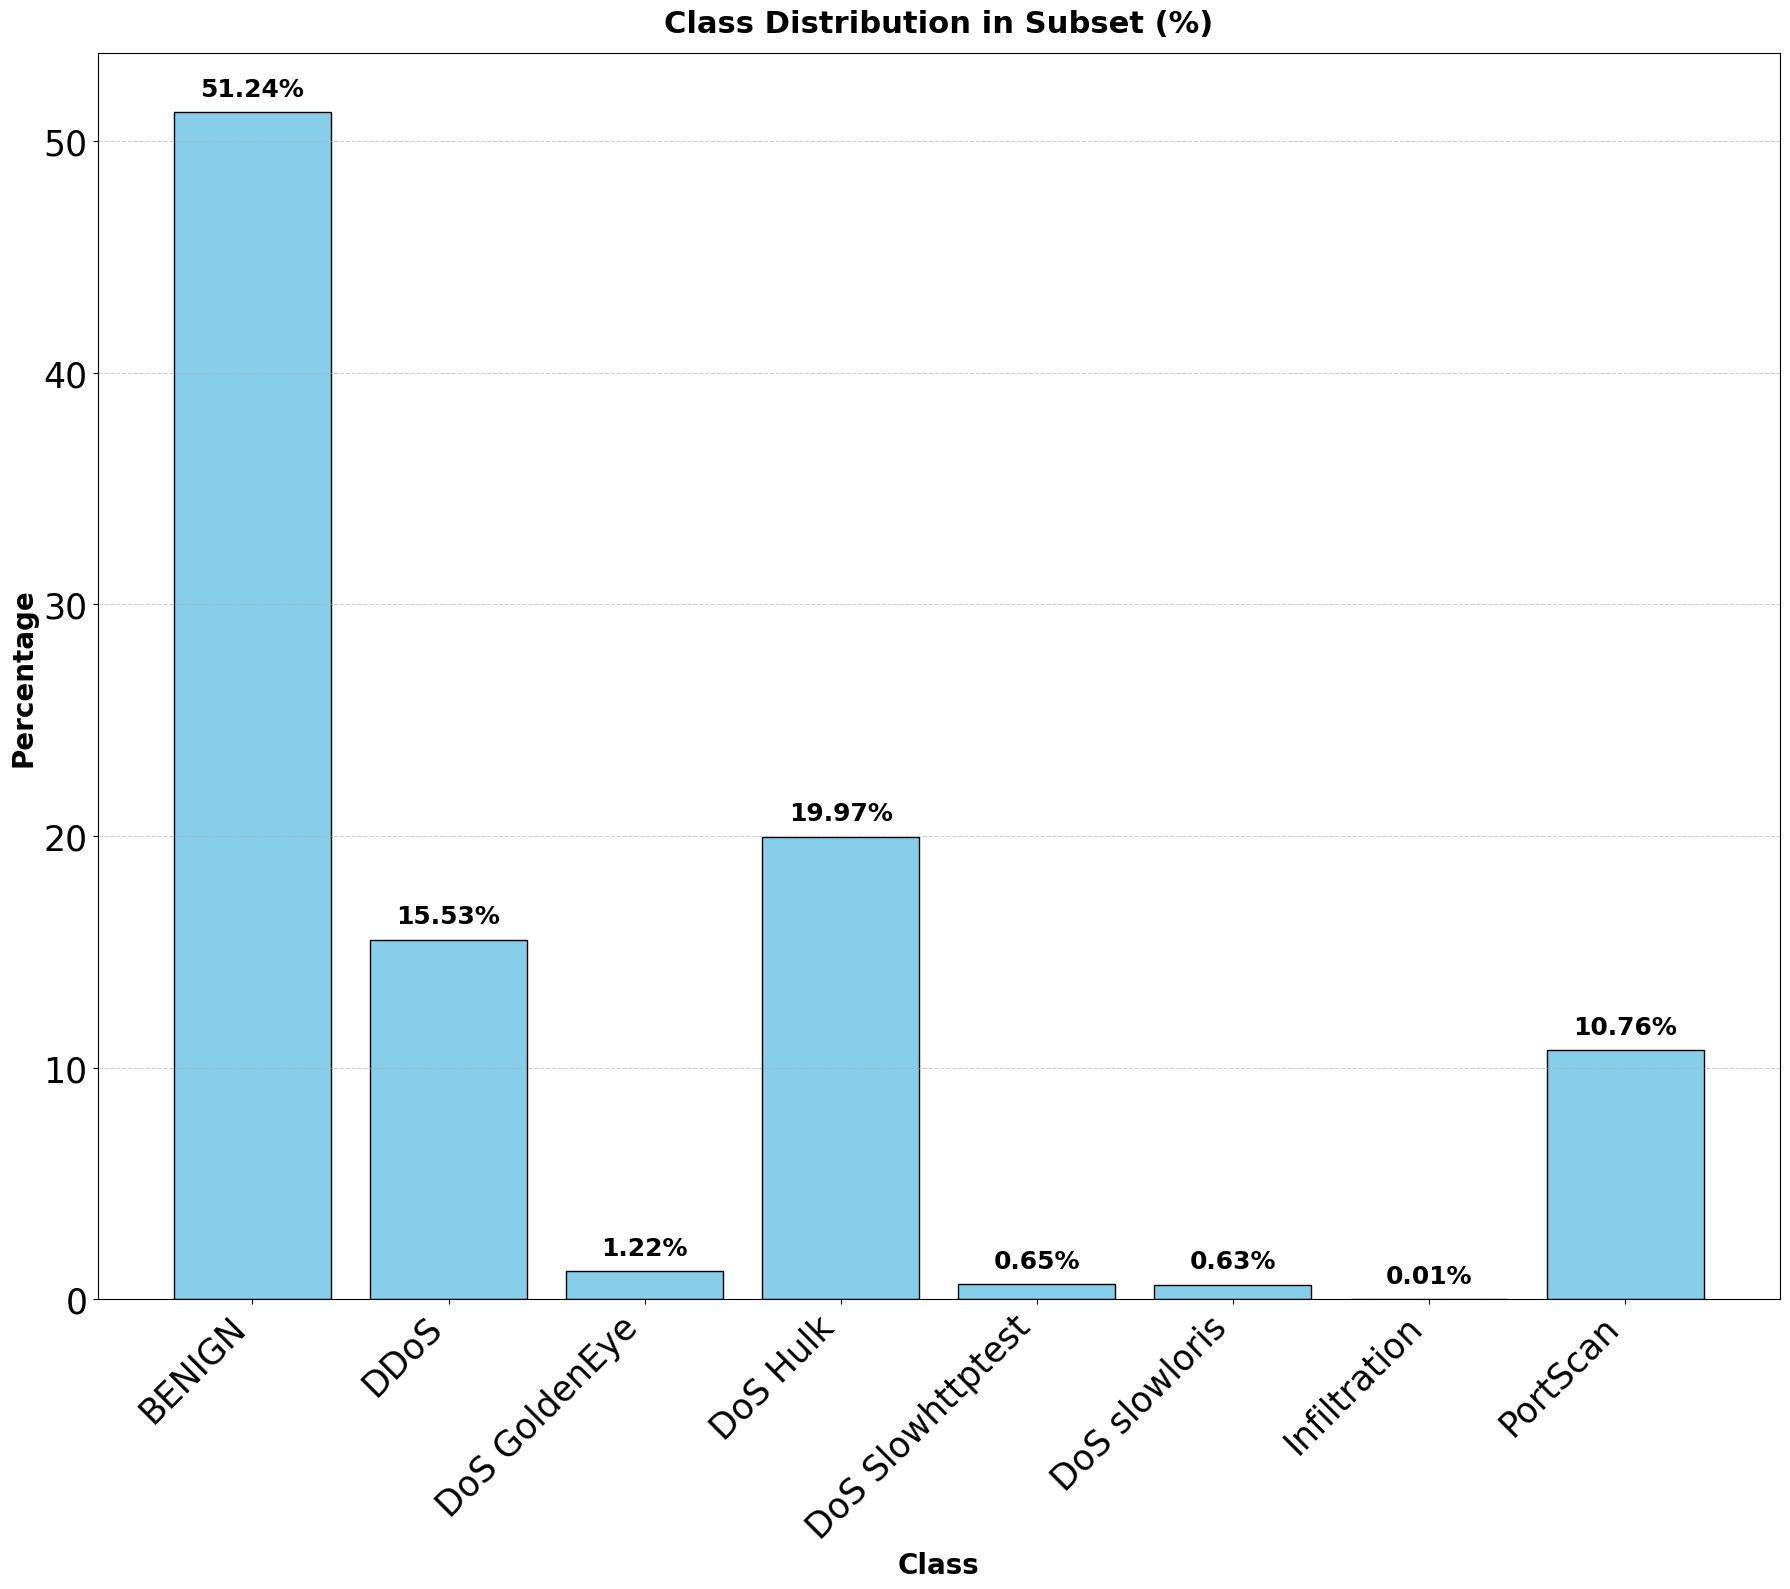

In [17]:
import matplotlib.pyplot as plt

# Clean the dataset from NaN values
df_clean = df_subset.dropna()

target_col = "Label" 
if target_col in df_clean.columns:

    # Count and percentage per class
    class_counts = df_clean[target_col].value_counts().sort_index()
    class_percent = (class_counts / len(df_clean) * 100).round(2)

    print("\n📊 Class distribution in subset (%):")
    print(class_percent)

    # Create the figure
    fig, ax = plt.subplots(figsize=(18, 16))  

    bars = ax.bar(class_percent.index, class_percent.values, color="skyblue", edgecolor="black")

    # Add percentages above bars
    for bar, pct in zip(bars, class_percent.values):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.5,       # slightly above the bar
            f"{pct:.2f}%",
            ha="center",
            va="bottom",
            fontsize=18,
            fontweight="bold"
        )

    # Formatting
    ax.set_title("Class Distribution in Subset (%)", fontsize=22, pad=15, fontweight="bold")
    ax.set_xlabel("Class", fontsize=20, fontweight="bold")
    ax.set_ylabel("Percentage", fontsize=20, fontweight="bold")
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    ax.set_xticklabels(class_percent.index, rotation=45, ha="right")
    ax.grid(axis="y", linestyle="--", alpha=0.6)
    plt.subplots_adjust(bottom=0.35) 
    plt.tight_layout()
    plt.savefig('fig1.png')
    plt.show()
     

else:
    print(f"⚠️ Column '{target_col}' not found in df_clean.")


In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pointbiserialr

# Encode Label as numeric for correlation
le = LabelEncoder()
y = le.fit_transform(df_clean['Label'])

numeric_features = df_clean.select_dtypes(include=['int64', 'float64'])
feature_scores = {}

for col in numeric_features.columns:
    corr, _ = pointbiserialr(numeric_features[col], y)
    feature_scores[col] = abs(corr)

# Sort features by absolute correlation
sorted_features = sorted(feature_scores, key=lambda x: feature_scores[x], reverse=True)
print("Top features:", sorted_features[:5])  # top 5 features for visualization


Top features: ['Bwd_Packet_Length_Min', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Flow_IAT_Max', 'Flow_IAT_Std']


C:\Users\HP\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:5535: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)


In [21]:
numeric_features.var().sort_values(ascending=False).head(5)


Fwd_IAT_Total     1672202375206567.0
Flow_Duration    1670442933832888.75
Idle_Max         1345655156407520.25
Fwd_IAT_Max       1343717397425020.5
Flow_IAT_Max      1337350436221111.0
dtype: Float64

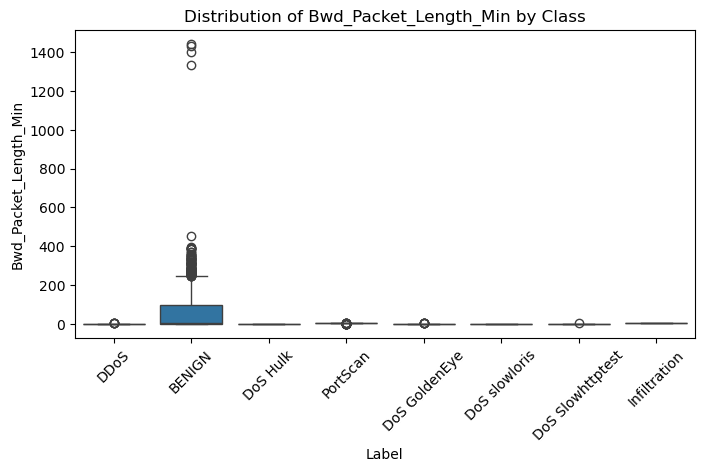

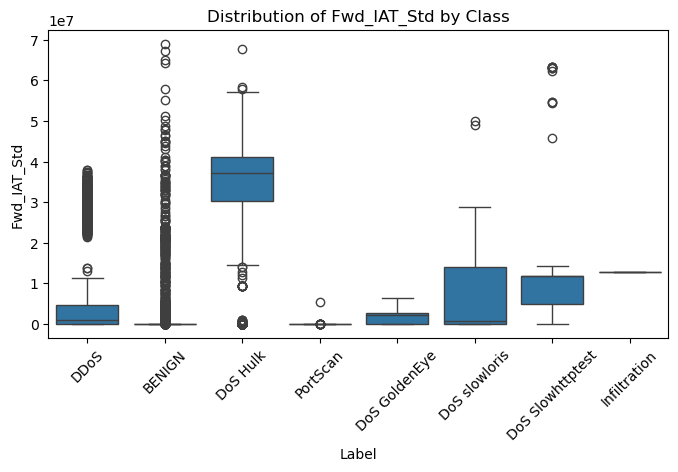

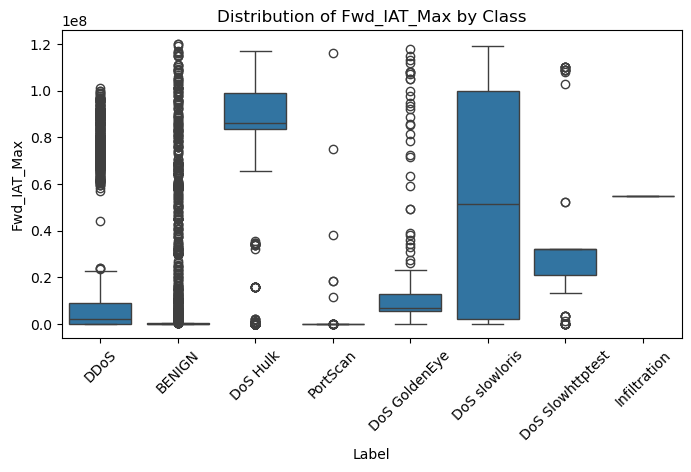

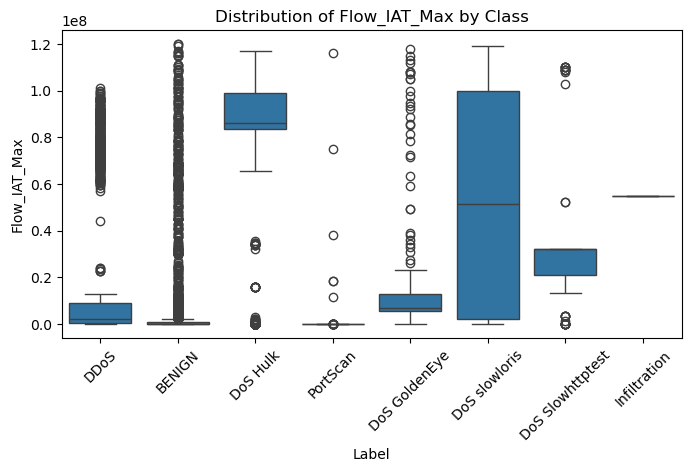

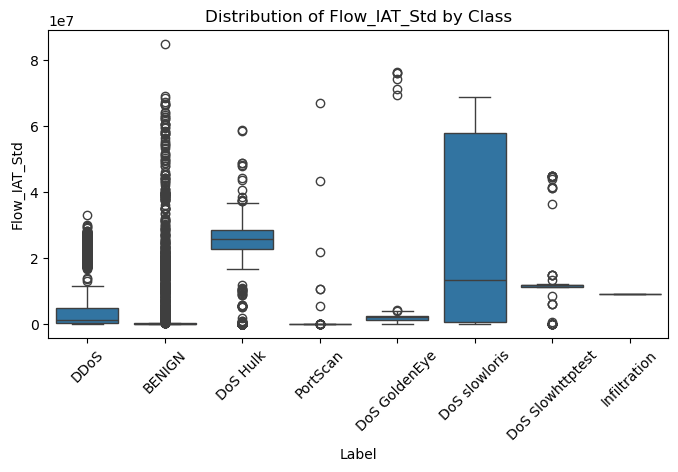

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

top_features = sorted_features[:5]

for i, feature in enumerate(top_features, start=1):
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Label', y=feature, data=df_clean)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {feature} by Class')

    # Save with unique name
    filename = f'fig2_{i}_{feature}.png'
    plt.savefig(filename, bbox_inches='tight') 
    
    plt.show()
    


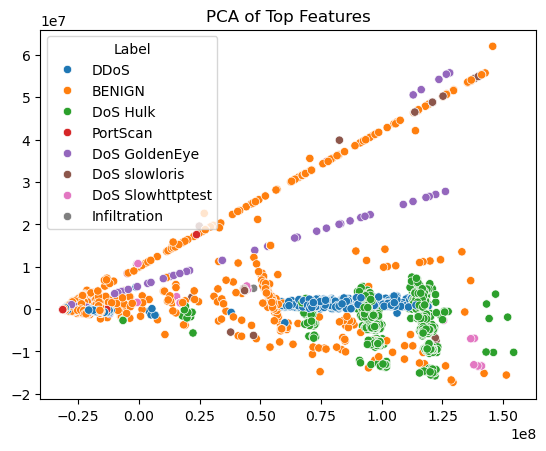

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(numeric_features[top_features])  # only top features

sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=df_clean['Label'], palette="tab10")
plt.title("PCA of Top Features")
plt.savefig('fig3.png')
plt.show()
 


In [29]:
# ============================================
#  1. IMPORTS
# ============================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# ============================================
#  2. CLEAN DATA (REMOVE RARE CLASSES)
# ============================================

# Remove classes with fewer than 2 samples
df_ml = df_clean.groupby('Label').filter(lambda x: len(x) > 1)

print("✅ Classes kept after filtering:")
print(df_ml['Label'].value_counts())
print("Total samples after filtering:", len(df_ml))

# ============================================
#  3. SPLIT FEATURES (X) AND TARGET (y)
# ============================================

X = df_ml.drop(columns=['Label'])
y = df_ml['Label']

# ============================================
#  4. TRAIN / TEST SPLIT (with stratification)
# ============================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print(f"✅ Training set: {X_train.shape}, Test set: {X_test.shape}")

# ============================================
#  5. FEATURE SCALING
# ============================================

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ============================================
#  6. MODEL TRAINING
# ============================================

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# ============================================
#  7. MODEL EVALUATION
# ============================================

y_pred = model.predict(X_test_scaled)

print("\n=====  LABEL CLASSIFICATION REPORT  =====")
print(classification_report(y_test, y_pred))

# ============================================
#  8. FEATURE IMPORTANCE
# ============================================

importances = model.feature_importances_
feat_importance = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

print("\n=====  TOP FEATURES FOR LABEL PREDICTION  =====")
print(feat_importance.head(10))


✅ Classes kept after filtering:
Label
BENIGN              7548
DoS Hulk            2942
DDoS                2287
PortScan            1585
DoS GoldenEye        179
DoS Slowhttptest      96
DoS slowloris         93
Name: count, dtype: int64
Total samples after filtering: 14730
✅ Training set: (11784, 80), Test set: (2946, 80)

=====  LABEL CLASSIFICATION REPORT  =====
                  precision    recall  f1-score   support

          BENIGN       1.00      1.00      1.00      1510
            DDoS       1.00      1.00      1.00       457
   DoS GoldenEye       0.97      1.00      0.99        36
        DoS Hulk       1.00      1.00      1.00       588
DoS Slowhttptest       1.00      1.00      1.00        19
   DoS slowloris       1.00      1.00      1.00        19
        PortScan       1.00      1.00      1.00       317

        accuracy                           1.00      2946
       macro avg       1.00      1.00      1.00      2946
    weighted avg       1.00      1.00      1.00  

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


df_attack = df_ml[df_ml['Label'] != 'BENIGN']  # only attacks
X_attack = df_attack.drop(columns=['Label', 'is_attack'], errors='ignore')
y_attack = df_attack['Label']

# Encode attack types
le_attack = LabelEncoder()
y_attack_encoded = le_attack.fit_transform(y_attack)

# Train/test split
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(
    X_attack, y_attack_encoded, test_size=0.2, stratify=y_attack_encoded, random_state=42
)

# Scale numeric features
scaler = StandardScaler()
X_train_a_scaled = scaler.fit_transform(X_train_a)
X_test_a_scaled = scaler.transform(X_test_a)


rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_a_scaled, y_train_a)

# Predictions
y_pred = rf.predict(X_test_a_scaled)
y_pred_labels = le_attack.inverse_transform(y_pred)

print("=====  Attack Type Classification =====")
print(classification_report(le_attack.inverse_transform(y_test_a), y_pred_labels))


# Feature importance

importances2 = pd.Series(rf.feature_importances_, index=X_attack.columns).sort_values(ascending=False)
print("Top features for attack type prediction:\n", importances2.head(10))


=====  Attack Type Classification =====
                  precision    recall  f1-score   support

            DDoS       1.00      1.00      1.00       457
   DoS GoldenEye       1.00      0.97      0.99        36
        DoS Hulk       1.00      1.00      1.00       589
DoS Slowhttptest       0.86      1.00      0.93        19
   DoS slowloris       1.00      0.84      0.91        19
        PortScan       1.00      1.00      1.00       317

        accuracy                           1.00      1437
       macro avg       0.98      0.97      0.97      1437
    weighted avg       1.00      1.00      1.00      1437

Top features for attack type prediction:
 Attack_Number                  0.110948
Avg_Fwd_Segment_Size           0.059920
Init_Win_bytes_backward        0.059756
Subflow_Fwd_Bytes              0.056707
Total_Length_of_Fwd_Packets    0.052887
Fwd_Packet_Length_Max          0.052315
Fwd_Packet_Length_Mean         0.047337
Packet_Length_Mean             0.041321
Fwd_Packet_Leng